# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [0]:
!ls -a

.   .config    dogImages.zip  lfw.zip	model_scratch.pt   sample_data
..  dogImages  lfw	      __MACOSX	model_transfer.pt


In [4]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2020-04-06 14:06:27--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.128
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.5MB/s    in 53s     

2020-04-06 14:07:21 (20.3 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [5]:
!unzip dogImages.zip

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03435.jpg  
  inflating: dogImages/train/048.Chihua

In [6]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2020-04-06 14:07:43--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  20.0MB/s    in 10s     

2020-04-06 14:07:53 (18.7 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [7]:
!unzip lfw.zip

Streaming output truncated to the last 5000 lines.
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/Stella_Tennant/
  inflating: lfw/Stella_Tenn

In [20]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


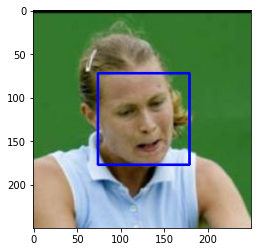

In [21]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [23]:
h = 0
for img in human_files[:100]:
    if face_detector(img):
        h += 1
print(h)

99


In [24]:
h = 0
for img in dog_files[:100]:
    if face_detector(img):
        h += 1
print(h)

6


### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
99% (human images) and 6% (dog images)

In [0]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
VGG16.eval()
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    image_ = img = cv2.imread(img_path)
    
    image_ =  image_/255.0
    
    output_size = (224, 224)
    h, w = image_.shape[:2]
    if isinstance(output_size, int):
        if h > w:
            new_h, new_w = output_size * h / w, output_size
        else:
            new_h, new_w = output_size, output_size * w / h
    else:
        new_h, new_w = output_size

    new_h, new_w = int(new_h), int(new_w)

    image_ = cv2.resize(image_, (new_w, new_h))
    if(len(image_.shape) == 2):
            image_ = image_.reshape(image_.shape[0], image_.shape[1], 1)
    image_ = image_.transpose((2, 0, 1))

    image_ = torch.from_numpy(image_).float().unsqueeze(0).cuda()

    output = VGG16(image_)
    out = output.cpu().detach().numpy()
    np.argmax(out)
    
    return np.argmax(out) # predicted class index

In [28]:
VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

252

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    pred = VGG16_predict(img_path)
    if pred>=151 and pred<=268:
        return True


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [30]:
h = 0
for f in human_files_short:
    if dog_detector(f):
        h += 1
print(h)

0


In [31]:
h = 0
for f in dog_files_short:
    if dog_detector(f):
        h += 1
print(h)

91


__Answer:__ 


0% in human_files_short and 91% in dog_files_short

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import torch
import os
from torchvision import datasets
from torchvision import transforms

## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([transforms.Resize(250),
                                     transforms.RandomCrop(224),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data_transform2 = transforms.Compose([transforms.Resize(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = datasets.ImageFolder(root='dogImages/train', transform=data_transform2)
val_dataset = datasets.ImageFolder(root='dogImages/valid', transform=data_transform2)
test_dataset = datasets.ImageFolder(root='dogImages/test', transform=data_transform2)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, num_workers=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=128, num_workers=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, num_workers=0, shuffle=True)
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes


loaders = {'train':train_loader, 'valid':val_loader, 'test':test_loader}

In [32]:
type(train_dataset[-1][1])

int

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
- (224,224,3) because it's the default VGG16 input
- I first resize the image to 250, then use random crop to get a size of 224
- To augment this dataset, I used RandomCrop with RandomHorizontalFlip from transforms

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
# can use the below import should you choose to initialize the weights of your Net
import torch.nn.init as I


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        
        ## TODO: Define all the layers of this CNN, the only requirements are:
        ## 1. This network takes in a square (same width and height), grayscale image as input
        ## 2. It ends with a linear layer that represents the keypoints
        ## it's suggested that you make this last layer output 136 values, 2 for each of the 68 keypoint (x, y) pairs
        
        # As an example, you've been given a convolutional layer, which you may (but don't have to) change:
        # 1 input image channel (grayscale), 32 output channels/feature maps, 5x5 square convolution kernel
        
        ## Input 224
        self.conv1 = nn.Conv2d(3, 32, 5)
        self.a1 = nn.ReLU()
        self.mp1 = nn.MaxPool2d(2)
        self.drop1 = nn.Dropout(p=0.2)
        
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.a2 = nn.ReLU()
        self.mp2 = nn.MaxPool2d(2)
        self.drop2 = nn.Dropout(p=0.2)
        
        self.conv3 = nn.Conv2d(64, 128, 5)
        self.a3 = nn.ReLU()
        self.mp3 = nn.MaxPool2d(2)
        self.drop3 = nn.Dropout(p=0.3)
        
        self.conv4 = nn.Conv2d(128, 256, 5)
        self.a4 = nn.ReLU()
        self.mp4 = nn.MaxPool2d(2)
        self.drop4 = nn.Dropout(p=0.4)

        self.flatten = nn.Flatten()

        self.dense1 = nn.Linear(25600, 1000)
        self.a5 = nn.ReLU()
        self.drop5 = nn.Dropout(p=0.5)
        self.dense2 = nn.Linear(1000, 133)
        ## Note that among the layers to add, consider including:
        # maxpooling layers, multiple conv layers, fully-connected layers, and other layers (such as dropout or batch normalization) to avoid overfitting
        

        
    def forward(self, x):
        ## TODO: Define the feedforward behavior of this model
        ## x is the input image and, as an example, here you may choose to include a pool/conv step:
        ## x = self.pool(F.relu(self.conv1(x)))
        x = self.drop1(self.mp1(self.a1(self.conv1(x))))
        x = self.drop2(self.mp2(self.a2(self.conv2(x))))
        x = self.drop3(self.mp3(self.a3(self.conv3(x))))
        x = self.drop4(self.mp4(self.a4(self.conv4(x))))
        x = self.flatten(x)
        x = self.drop5(self.a5(self.dense1(x)))
        x = self.dense2(x)
        
        # a modified x, having gone through all the layers of your model, should be returned
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
use_cuda = True
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I used a series of conv2d layers followed by relu activations, followed by  maxpooling2d layers with dropout to avoid overfitting. At the end, I used two linear layers with dropout.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
# optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.05)
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
!# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    torch.cuda.empty_cache()
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU/
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
                output = model(data)
                
                loss = criterion(output, target)
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            ## record the average training loss, using something like
                train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                with torch.no_grad():
                    output = model(data)
                    loss = criterion(output, target)
                    valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            ## update the average validation loss

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model


# # train the model
# model_scratch = train(3, loaders, model_scratch, optimizer_scratch, 
#                       criterion_scratch, use_cuda, 'model_scratch.pt')

# # load the model that got the best validation accuracy
# model_scratch.load_state_dict(torch.load('model_scratch.pt'))



### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [43]:
model_scratch = train(30, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.884669 	Validation Loss: 4.881638
Epoch: 2 	Training Loss: 4.860347 	Validation Loss: 4.845341
Epoch: 3 	Training Loss: 4.782153 	Validation Loss: 4.790027
Epoch: 4 	Training Loss: 4.713522 	Validation Loss: 4.720751
Epoch: 5 	Training Loss: 4.678655 	Validation Loss: 4.702052
Epoch: 6 	Training Loss: 4.650772 	Validation Loss: 4.690855
Epoch: 7 	Training Loss: 4.630262 	Validation Loss: 4.676610
Epoch: 8 	Training Loss: 4.571749 	Validation Loss: 4.617809
Epoch: 9 	Training Loss: 4.483972 	Validation Loss: 4.598330
Epoch: 10 	Training Loss: 4.459536 	Validation Loss: 4.960051
Epoch: 11 	Training Loss: 4.600094 	Validation Loss: 4.614086
Epoch: 12 	Training Loss: 4.493295 	Validation Loss: 4.572227
Epoch: 13 	Training Loss: 4.391572 	Validation Loss: 4.567967
Epoch: 14 	Training Loss: 4.368223 	Validation Loss: 4.492052
Epoch: 15 	Training Loss: 4.341788 	Validation Loss: 4.539508
Epoch: 16 	Training Loss: 4.297739 	Validation Loss: 4.359870
Epoch: 17 	Traini

In [45]:
model_scratch = train(10, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 3.853868 	Validation Loss: 4.323906
Epoch: 2 	Training Loss: 3.805868 	Validation Loss: 4.502358
Epoch: 3 	Training Loss: 3.763402 	Validation Loss: 4.493467
Epoch: 4 	Training Loss: 3.800471 	Validation Loss: 4.119368
Epoch: 5 	Training Loss: 3.710377 	Validation Loss: 4.342145
Epoch: 6 	Training Loss: 3.643080 	Validation Loss: 4.311207
Epoch: 7 	Training Loss: 3.656795 	Validation Loss: 4.088404
Epoch: 8 	Training Loss: 3.627995 	Validation Loss: 4.387772
Epoch: 9 	Training Loss: 3.574287 	Validation Loss: 4.521070
Epoch: 10 	Training Loss: 3.599993 	Validation Loss: 4.094368


In [39]:
model_scratch = train(10, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.104189 	Validation Loss: 4.270988
Epoch: 2 	Training Loss: 3.088143 	Validation Loss: 4.268821
Epoch: 3 	Training Loss: 3.033205 	Validation Loss: 4.479106
Epoch: 4 	Training Loss: 2.978781 	Validation Loss: 4.225830
Epoch: 5 	Training Loss: 2.971924 	Validation Loss: 3.996644
Epoch: 6 	Training Loss: 2.846513 	Validation Loss: 4.909273
Epoch: 7 	Training Loss: 2.891806 	Validation Loss: 4.203551
Epoch: 8 	Training Loss: 2.812030 	Validation Loss: 4.625050
Epoch: 9 	Training Loss: 2.866733 	Validation Loss: 4.259358
Epoch: 10 	Training Loss: 2.722981 	Validation Loss: 4.147464


<All keys matched successfully>

In [37]:
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

<All keys matched successfully>

In [40]:
import numpy as np
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.243124


Test Accuracy: 12% (102/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [0]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

In [11]:
import torchvision.models as models
import torch.nn as nn
use_cuda = True
## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(4096, 133)


if use_cuda:
    model_transfer = model_transfer.cuda()
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
THe classifier layer of VGG16 is already pretty good. I just replaced the last leniar layer to output 133 classes and retrained the last fully connected layer. VGG16 is a pretty good architecture with proven performance.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.001)

model_transfer = train(10, loaders  , model_transfer, optimizer_transfer, criterion, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 1.617229 	Validation Loss: 0.665020
Epoch: 2 	Training Loss: 0.610185 	Validation Loss: 0.575535
Epoch: 3 	Training Loss: 0.490924 	Validation Loss: 0.569867
Epoch: 4 	Training Loss: 0.447497 	Validation Loss: 0.553266
Epoch: 5 	Training Loss: 0.401898 	Validation Loss: 0.595037
Epoch: 6 	Training Loss: 0.359999 	Validation Loss: 0.539472
Epoch: 7 	Training Loss: 0.340923 	Validation Loss: 0.542510
Epoch: 8 	Training Loss: 0.330258 	Validation Loss: 0.583389
Epoch: 9 	Training Loss: 0.305750 	Validation Loss: 0.541239
Epoch: 10 	Training Loss: 0.284883 	Validation Loss: 0.543355


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [13]:
test(loaders, model_transfer, criterion, True)

Test Loss: 0.518677


Test Accuracy: 83% (702/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def load_input_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model_transfer.cpu()
    # model = model.cpu()
    model_transfer.eval()
    idx = torch.argmax(model_transfer(img))
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    if dog_detector(img_path) is True:
        prediction = predict_breed_transfer(img_path)
        print("Dogs Detected!\nIt looks like a {0}".format(prediction))  
    elif face_detector(img_path) > 0:
        prediction = predict_breed_transfer(img_path)
        print("Hello, human!\nIf you were a dog..You may look like a {0}".format(prediction))
    else:
        print("Error! Can't detect anything..")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
- more image datasets of dogs will improve training models. Also, more image augmentations trials (flipping vertically, move left or right, etc.) will improve performance on test data.

- Hyper-parameter tunings: weight initializings, learning rates, drop-outs, batch_sizes, and optimizers will be helpful to improve performances.

- Ensembles of models


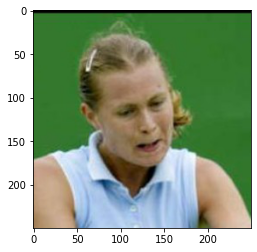

Hello, human!
If you were a dog..You may look like a Dachshund


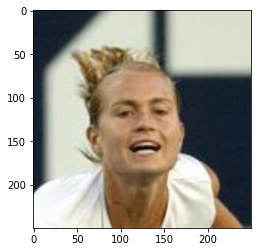

Hello, human!
If you were a dog..You may look like a Silky terrier


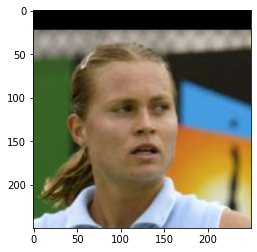

Hello, human!
If you were a dog..You may look like a Dachshund


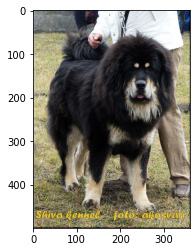

Dogs Detected!
It looks like a Tibetan mastiff


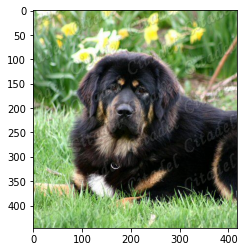

Dogs Detected!
It looks like a Tibetan mastiff


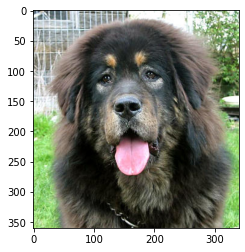

Dogs Detected!
It looks like a Tibetan mastiff


In [61]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
my_human_files = ['./my_images/human_1.jpg', './my_images/human_2.jpg', './my_images/human_3.jpg' ]
my_dog_files = ['./my_images/dog_1.jpeg', './my_images/dog_2.jpg', './my_images/dog_3.jpg']

## suggested code, below
for file in np.hstack((my_human_files, my_dog_files)):
    run_app(file)